# Analisis exploratorio de datos (EDA)

### Importar las librerias necesarias 

In [5]:
import pandas as pd # Importa la biblioteca pandas para análisis y manipulación de datos
import missingno as msno # Importa la biblioteca missingno para visualizar datos faltantes
import matplotlib.pyplot as plt # Importa la biblioteca matplotlib para la visualización de datos
from wordcloud import WordCloud # Importa la clase WordCloud de la biblioteca wordcloud para generar nubes de palabras
import sweetviz as sv # Importa la biblioteca sweetviz para la generación automática de informes de EDA (análisis exploratorio de datos)
import seaborn as sns # Importa la biblioteca seaborn para la visualización avanzada de datos


d:\HENRY\ProyectoIndividual_1\PROYECTO_INDIVIDUAL\ruthenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Cargar la data del archi csv

In [6]:
# Cargar el dataset en un DataFrame, se divide en dos partes para poder subirlo a github

parte1 = pd.read_csv('data_preparada_parte1.csv')
parte2 = pd.read_csv('data_preparada_parte2.csv')

# Concatenar las partes del dataframe
data = pd.concat([parte1, parte2], ignore_index=True)

In [7]:
# Verificamos el numero de registros de la data 
data.shape

(45346, 22)

In [8]:
# Generar estadísticas descriptivas
data.describe()

,id,runtime,popularity,vote_count,vote_average,release_year,revenue,budget,return
count,45346.000000,45100.000000,45346.000000,45346.000000,45346.000000,45346.000000,4.534600e+04,4.534600e+04,4.534600e+04
mean,108042.219645,94.177805,2.926188,110.135293,5.624196,1991.882834,1.123366e+07,4.232580e+06,6.604792e+02
std,112187.326746,38.348775,6.010970,491.899276,1.915339,24.053040,6.440990e+07,1.744373e+07,7.471800e+04
min,2.000000,0.000000,0.000000,0.000000,0.000000,1874.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,26390.250000,85.000000,0.388732,3.000000,5.000000,1978.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,59852.500000,95.000000,1.130176,10.000000,6.000000,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,156601.500000,107.000000,3.689337,34.000000,6.800000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00
max,469172.000000,1256.000000,547.488298,14075.000000,10.000000,2020.000000,2.787965e+09,3.800000e+08,1.239638e+07


### Verificamos las primeras cinco columnas del dataFrame

In [9]:
data.head()

,id,title,tagline,overview,collection,genre,company,original_language,runtime,popularity,...,release_date,release_year,status,country,language,revenue,budget,return,actor,director
0,862,Toy Story,NaN,"Led by Woody, Andy's toys live happily in his ...",Toy Story Collection,"Animation, Comedy, Family",Pixar Animation Studios,en,81.0,21.946943,...,1995-10-30,1995,Released,United States of America,English,373554033.0,30000000.0,12.45,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,NaN,"Adventure, Fantasy, Family","TriStar Pictures, Teitler Film, Interscope Com...",en,104.0,17.015539,...,1995-12-15,1995,Released,United States of America,"English, Français",262797249.0,65000000.0,4.04,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,Grumpy Old Men Collection,"Romance, Comedy","Warner Bros., Lancaster Gate",en,101.0,11.712900,...,1995-12-22,1995,Released,United States of America,English,0.0,0.0,0.00,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...",NaN,"Comedy, Drama, Romance",Twentieth Century Fox Film Corporation,en,127.0,3.859495,...,1995-12-22,1995,Released,United States of America,English,81452156.0,16000000.0,5.09,"Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,Father of the Bride Collection,Comedy,"Sandollar Productions, Touchstone Pictures",en,106.0,8.387519,...,1995-02-10,1995,Released,United States of America,English,76578911.0,0.0,0.00,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Charles Shyer


In [10]:
# Verificamos los valores perdidos en cada columna
print(data.isnull().sum())

id                       0
title                    0
tagline              24959
overview               941
collection           40968
genre                 2384
company              11847
original_language       11
runtime                246
popularity               0
vote_count               0
vote_average             0
release_date             0
release_year             0
status                  80
country               6209
language              3889
revenue                  0
budget                   0
return                   0
actor                 2359
director              1007
dtype: int64


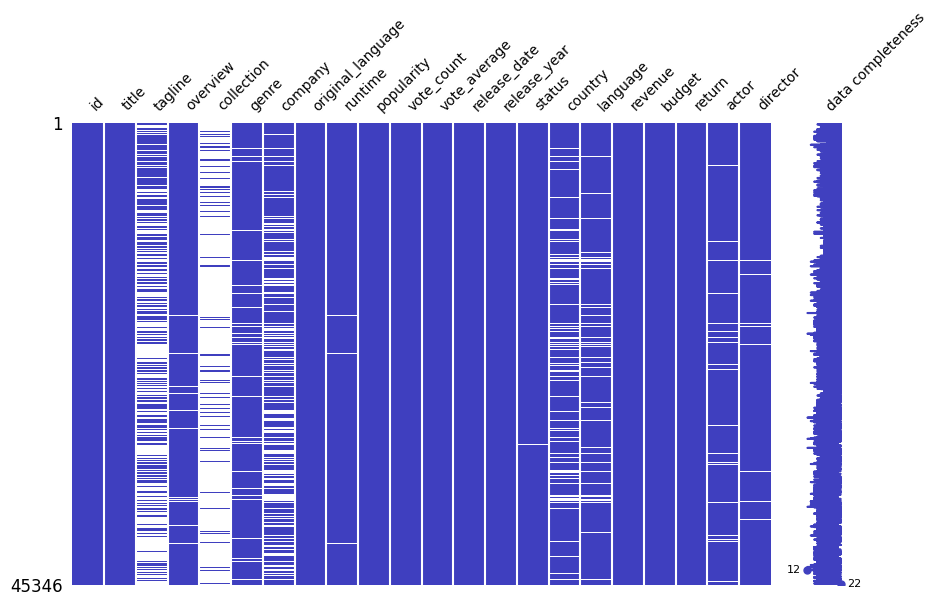

In [11]:
msno.matrix(data, 
            figsize=(10, 6),         # Tamaño de la figura
            color=(0.25, 0.25, 0.75),# Color de las barras de datos faltantes
            fontsize=10,             # Tamaño de la fuente de las etiquetas
            labels=True,             # Habilitar etiquetas

            )                 

# Mostrar el gráfico
plt.show()

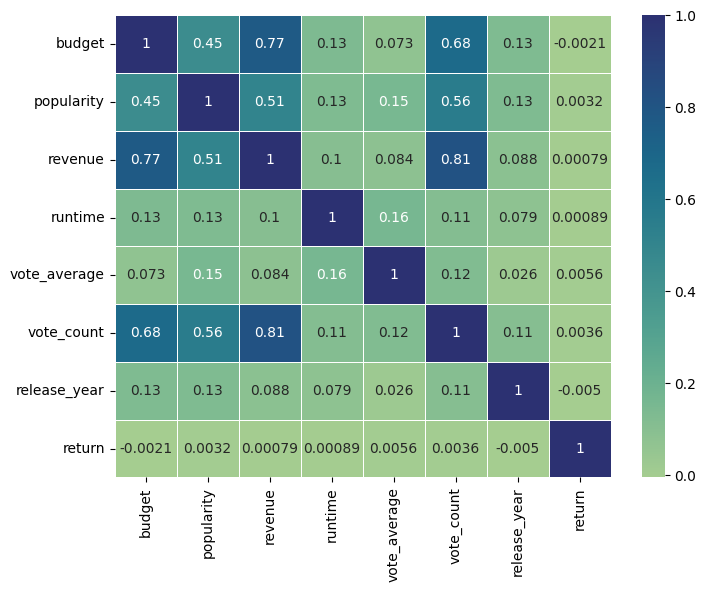

In [12]:

# Calcular la matriz de correlacion y mostrar el mapa de calor

df_aux = data[['budget','popularity','revenue', 'runtime',
                        'vote_average', 'vote_count', 'release_year', 'return']]
 # Calcular la correlacion de la matriz 
corr_matrix = df_aux.corr() 
plt.figure(figsize=(8,6))
# Graficar el mapa de calor de la correlacion.
sns.heatmap(corr_matrix, cmap="crest", linewidth=.5, annot= True) 
plt.show()

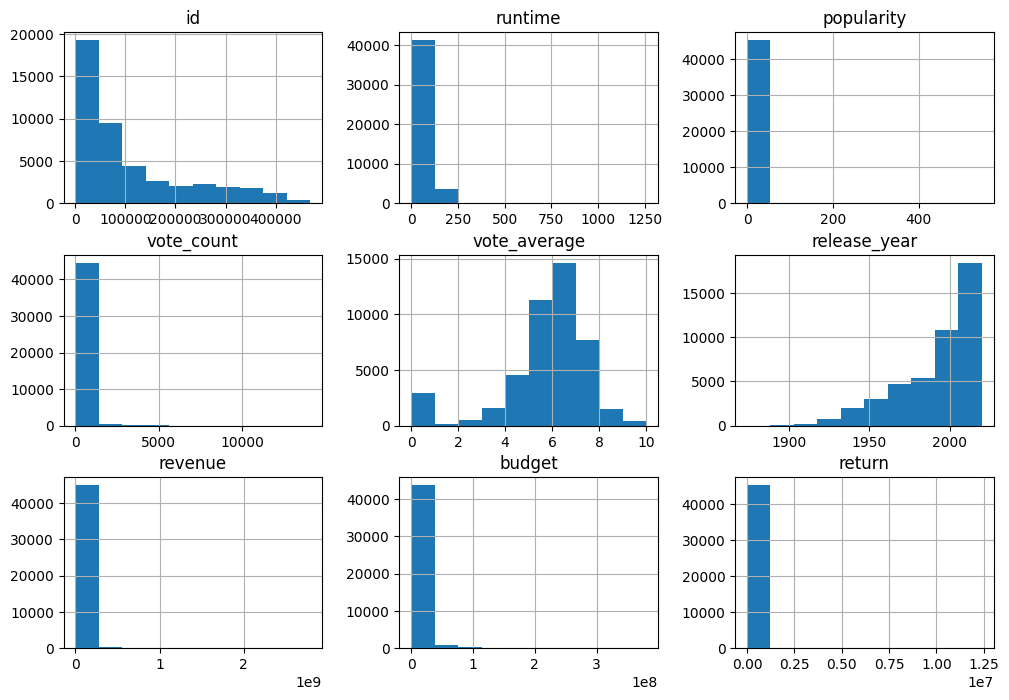

In [13]:
# Histogramas para variables numéricas
data.hist(figsize=(12, 8)
    )
plt.show()

<Axes: >

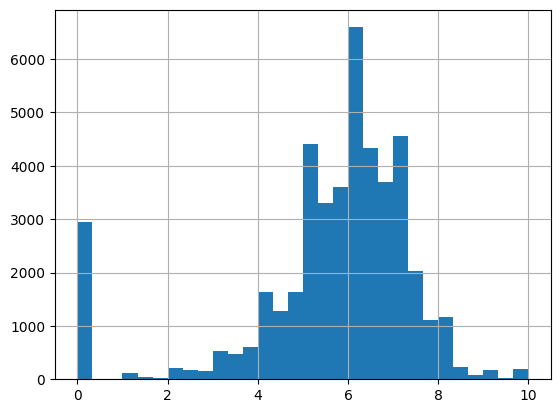

In [14]:
# Generar un histograma del atributo "vote_average".
data['vote_average'].hist(bins=30) 

<Axes: >

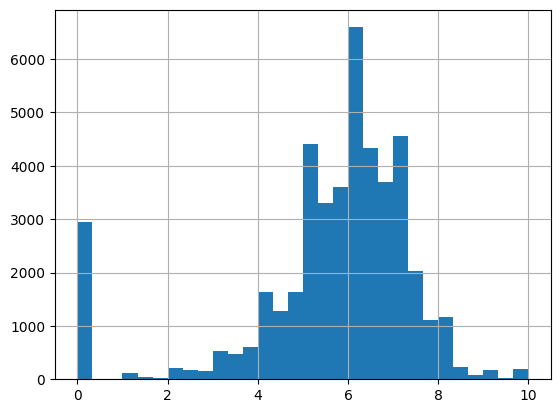

In [15]:
# Generar un histograma del atributo "rutntime".
data['vote_average'].hist(bins=30) 

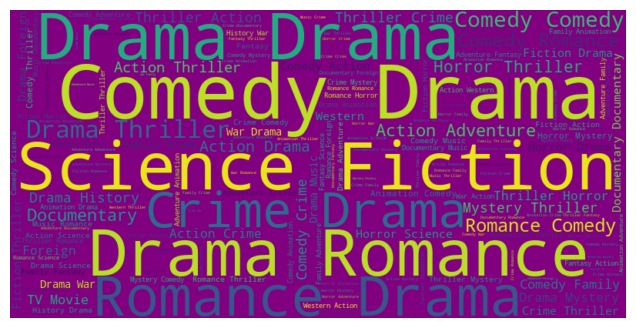

In [16]:
# Generar una nube de palabras de la columna 'genres'

# Filtrar los valores no nulos en la columna "genres"
filtered_cast = data['genre'].dropna()  

# Concatenar todos los valores en la columna filtrada en una sola cadena
column = ' '.join(filtered_cast) 

# Generar una nube de palabras basada en los valores concatenados
wordcloud = WordCloud(width=800, height=400, background_color='purple').generate(column)  

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 4))

# Mostrar la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")  # Ocultar los ejes
plt.show()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45346 entries, 0 to 45345
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 45346 non-null  int64  
 1   title              45346 non-null  object 
 2   tagline            20387 non-null  object 
 3   overview           44405 non-null  object 
 4   collection         4378 non-null   object 
 5   genre              42962 non-null  object 
 6   company            33499 non-null  object 
 7   original_language  45335 non-null  object 
 8   runtime            45100 non-null  float64
 9   popularity         45346 non-null  float64
 10  vote_count         45346 non-null  float64
 11  vote_average       45346 non-null  float64
 12  release_date       45346 non-null  object 
 13  release_year       45346 non-null  int64  
 14  status             45266 non-null  object 
 15  country            39137 non-null  object 
 16  language           414

In [18]:
# Generar estadísticas descriptivas
data.describe()

,id,runtime,popularity,vote_count,vote_average,release_year,revenue,budget,return
count,45346.000000,45100.000000,45346.000000,45346.000000,45346.000000,45346.000000,4.534600e+04,4.534600e+04,4.534600e+04
mean,108042.219645,94.177805,2.926188,110.135293,5.624196,1991.882834,1.123366e+07,4.232580e+06,6.604792e+02
std,112187.326746,38.348775,6.010970,491.899276,1.915339,24.053040,6.440990e+07,1.744373e+07,7.471800e+04
min,2.000000,0.000000,0.000000,0.000000,0.000000,1874.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,26390.250000,85.000000,0.388732,3.000000,5.000000,1978.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,59852.500000,95.000000,1.130176,10.000000,6.000000,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,156601.500000,107.000000,3.689337,34.000000,6.800000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00
max,469172.000000,1256.000000,547.488298,14075.000000,10.000000,2020.000000,2.787965e+09,3.800000e+08,1.239638e+07


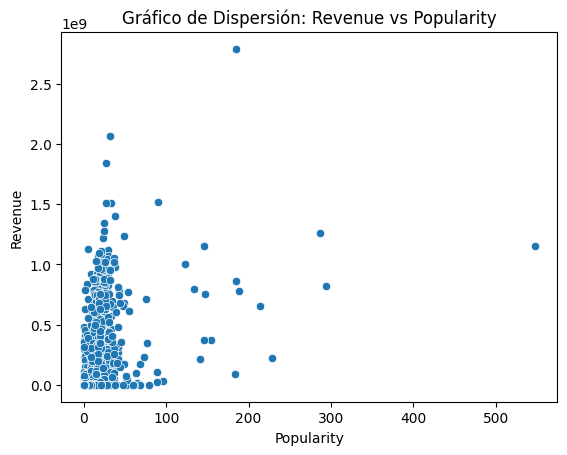

In [19]:
# Mostrar el grafico de dispersion de revenue y popularity con seaborn

import matplotlib.pyplot as plt
# Gráfico de dispersión de revenue y popularity con Seaborn
sns.scatterplot(x='popularity', y='revenue', data=data)
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Gráfico de Dispersión: Revenue vs Popularity')
plt.show()

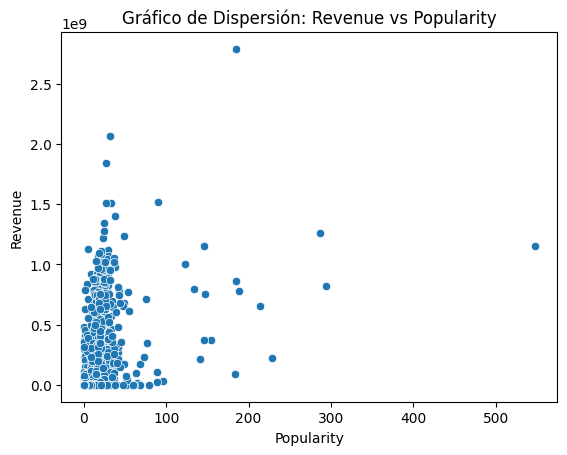

In [21]:
# Mostrar el grafico de dispersion de revenue y popularity con seaborn

import matplotlib.pyplot as plt
# Gráfico de dispersión de revenue y popularity con Seaborn
sns.scatterplot(x='popularity', y='revenue', data=data)
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Gráfico de Dispersión: Revenue vs Popularity')
plt.show()

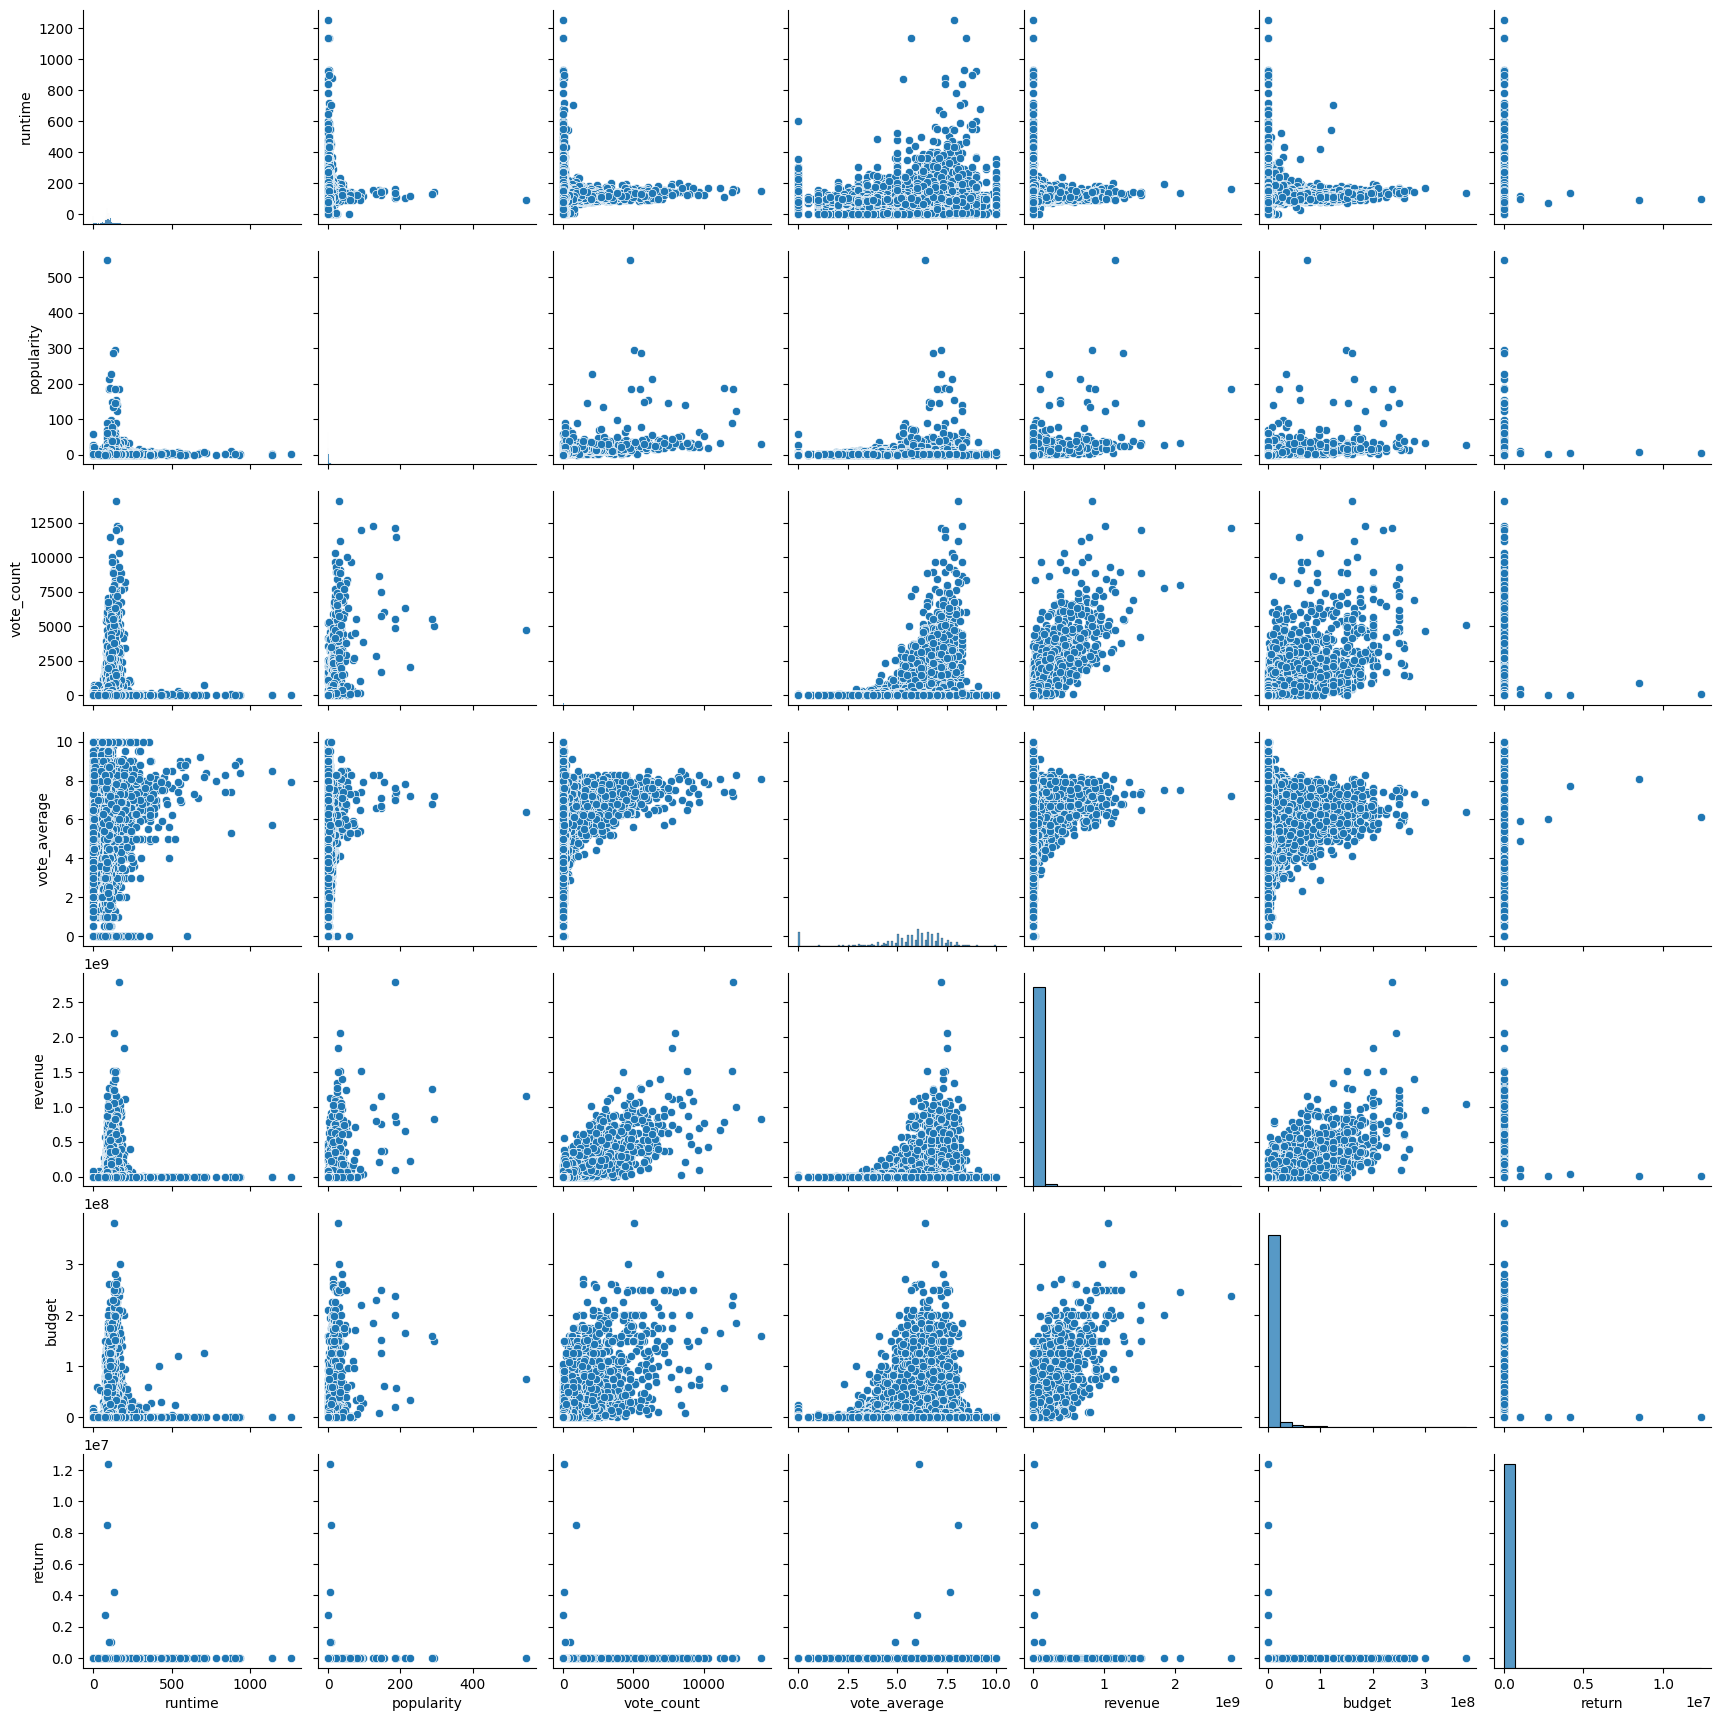

In [22]:
# Grafico de dispersion con todas las variables runtime, popularity, vote_count, vote_averange, release_year, revenue, budget, return

import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas relevantes
cols = ['runtime', 'popularity', 'vote_count', 'vote_average', 'revenue', 'budget', 'return'] 

# Crear el pairplot
sns.pairplot(data[cols])
plt.show()